<a href="https://colab.research.google.com/github/mmccleeseschool/Intro-to-machine-Learning/blob/main/McCleese_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing Ben_Affleck_0007.jpg


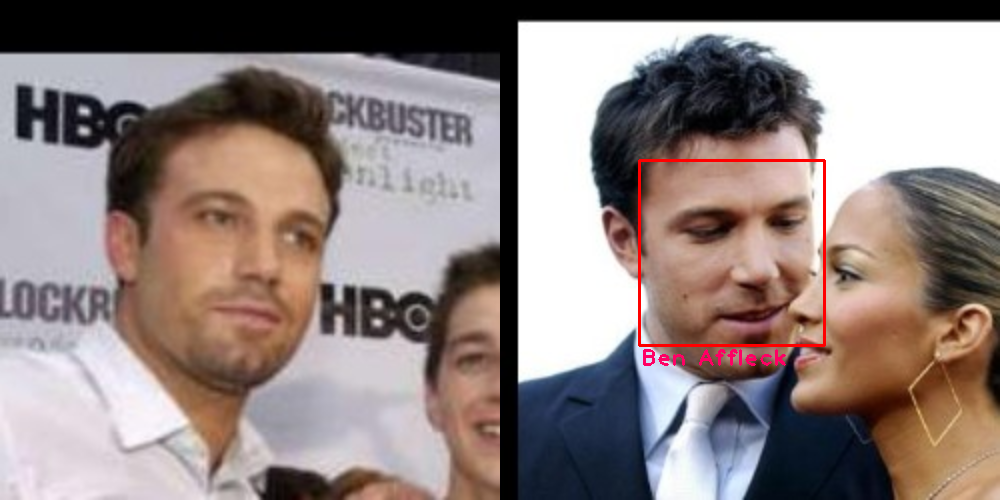

Processing Adam_Scott_0002.jpg


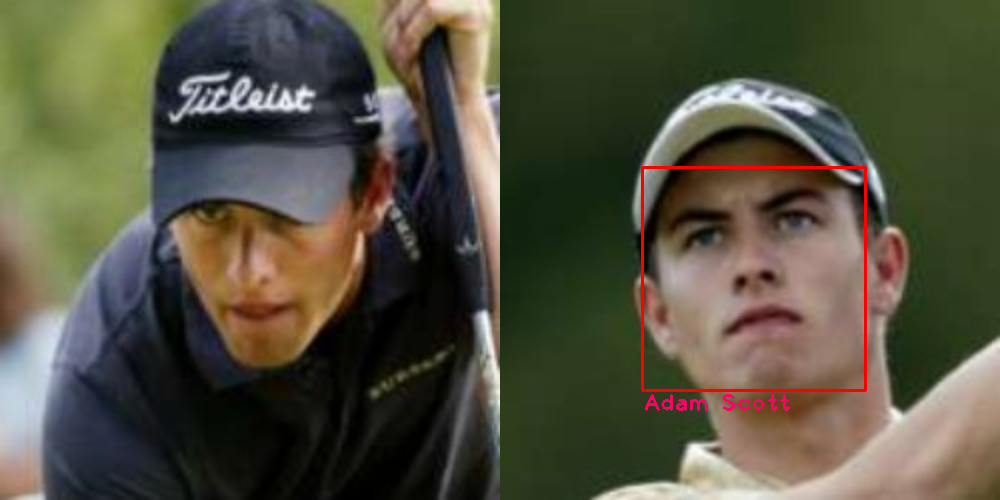

Processing Aaron_Peirsol_0003.jpg


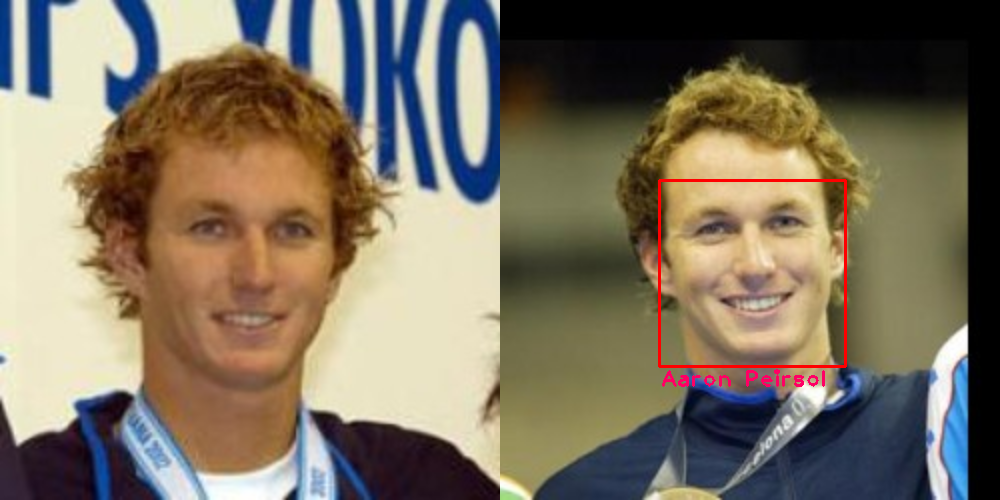

Processing Adam_Sandler_0004.jpg


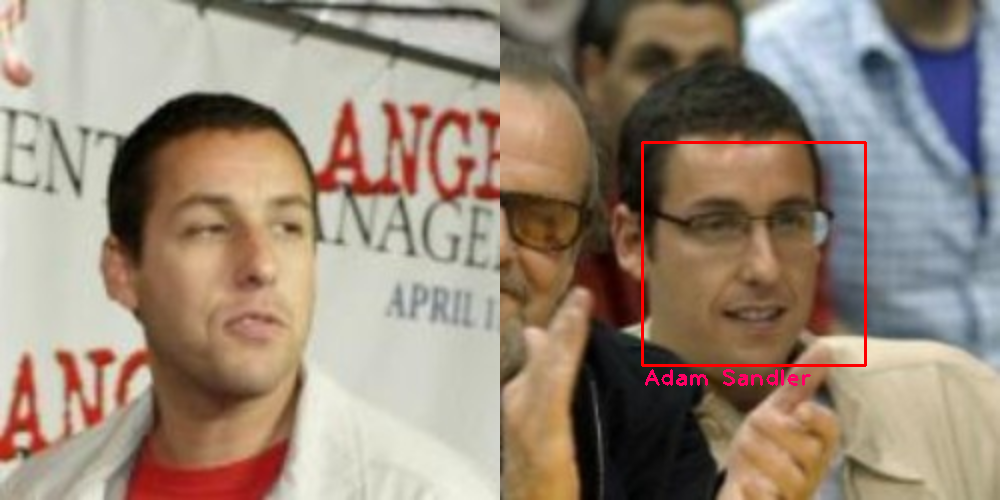

Processing Zydrunas_Ilgauskas_0001.jpg


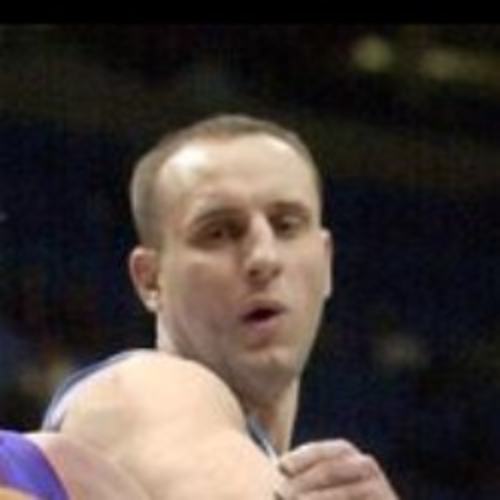

	he following are unidentified images:
Zydrunas_Ilgauskas_0001.jpg

the following people are missing:
Mike Pence
Donald Trump


In [39]:
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img,(width,height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir = 'unknown'

unidentified_names = []
recognized_names = set()

for file in os.listdir(unknown_dir):
    print('Processing', file)
    img_unknown = read_img(os.path.join(unknown_dir, file))
    img_enc = face_recognition.face_encodings(img_unknown)

    img_known = None
    identified = False

    if img_enc:
        img_enc = img_enc[0]
        results = face_recognition.compare_faces(known_encodings, img_enc)

        for i in range(len(results)):
            if results[i]:
                identified = True
                name = known_names[i]
                recognized_names.add(name)

                img_known = read_img(os.path.join(known_dir, known_names[i] + '.jpg'))

                (top, right, bottom, left) = face_recognition.face_locations(img_unknown)[0]
                cv2.rectangle(img_unknown, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.putText(img_unknown, name, (left + 2, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 1.5, (100, 0, 255), 2)
                break

    if not identified:
        unidentified_names.append(file)
    if img_known is not None:
        combined_img = np.hstack((img_known, img_unknown))
        cv2_imshow(combined_img)
    else:
        cv2_imshow(img_unknown)

if unidentified_names:
    print("\nthe following are unidentified images:")
    for unidentified in unidentified_names:
        print(unidentified)
else:
    print("All files were identified.")

recognized_names_set = set(recognized_names)
unrecognized_names = set(known_names) - recognized_names_set

if unrecognized_names:
    print("\nthe following people are missing:")
    for name in unrecognized_names:
        print(name)
else:
    print("All known names were recognized.")


